In [95]:
#importing the required libraries
import numpy as np
import pandas as pd
import pickle
import scipy.sparse as sp
from scipy.sparse.linalg import svds

In [174]:
ratings = pd.read_csv('/content/drive/My Drive/The travel Back/new_sample_data.csv')

In [110]:
ratings.head(2)

,Unnamed: 0,Unnamed: 0.1,user_id,restaurant_id,Rating_x,Unnamed: 0_y,resId,title,No_of_Reviews,Tags,Details,Range_n_Cuisine,clicked
0,0,0,0,363,0.0,363,363,Chartreuse Moose Cappuccino Bar & Bistro,170.0,"wraps , breakfast wrap , beans , great coffee...","{'CUISINES': 'Cafe, Canadian', 'Special Diets'...","['$$ - $$$', 'Quick Bites', 'Cafe', 'Canadian']",0
1,1,1,0,363,0.0,363,363,Chartreuse Moose Cappuccino Bar & Bistro,170.0,"wraps , breakfast wrap , beans , great coffee...","{'CUISINES': 'Cafe, Canadian', 'Special Diets'...","['$$ - $$$', 'Quick Bites', 'Cafe', 'Canadian']",1


In [175]:
ratings = ratings[['user_id', 'restaurant_id','Rating_x']]

In [112]:
ratings

,user_id,restaurant_id,Rating_x
0,0,363,0.0
1,0,363,0.0
2,0,363,0.0
3,0,363,0.0
4,0,363,0.0
...,...,...,...
2779,12,41,5.0
2780,12,41,5.0
2781,12,41,5.0
2782,12,41,5.0


In [113]:
ratings.head(2)

,user_id,restaurant_id,Rating_x
0,0,363,0.0
1,0,363,0.0


In [114]:
ratings_df = ratings.groupby(['user_id','restaurant_id']).aggregate(np.max)

In [118]:
ratings_df.head()

Rating_x
user_id restaurant_id          
0       217                 1.5
        363                 0.0
        370                 0.0
        373                 0.5
1       204                 2.5

In [119]:
len(ratings['user_id'].unique())

20

In [120]:
count_ratings = ratings.groupby('Rating_x').count()
count_ratings['perc_total']=round(count_ratings['user_id']*100/count_ratings['user_id'].sum(),1)

In [121]:
count_ratings

,user_id,restaurant_id,perc_total
Rating_x,,,
0.0,47,47,1.7
0.5,221,221,7.9
1.0,278,278,10.0
1.5,124,124,4.5
2.0,266,266,9.6
2.5,318,318,11.4
3.0,216,216,7.8
3.5,153,153,5.5
4.0,284,284,10.2


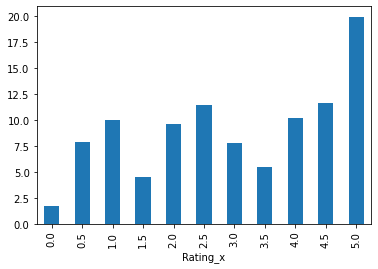

In [122]:
count_ratings['perc_total'].plot.bar()

In [123]:
ratings_df = pd.pivot_table(ratings, index='user_id', columns='restaurant_id', aggfunc=np.max)

In [124]:
ratings_df.head()

Rating_x                           ...                            
restaurant_id      10   41   204  217  225  363  ... 369  370  373  376  379 380
user_id                                          ...                            
0                  NaN  NaN  NaN  1.5  NaN  0.0  ... NaN  0.0  0.5  NaN  NaN NaN
1                  NaN  NaN  2.5  NaN  0.0  NaN  ... NaN  1.5  NaN  4.5  NaN NaN
2                  2.0  NaN  NaN  NaN  NaN  1.5  ... NaN  NaN  NaN  0.0  1.0 NaN
3                  NaN  4.0  NaN  NaN  4.5  4.0  ... NaN  NaN  NaN  0.0  1.0 NaN
4                  0.5  NaN  NaN  5.0  NaN  NaN  ... NaN  NaN  NaN  2.5  NaN NaN

[5 rows x 15 columns]

In [125]:
ratings_df

Rating_x                           ...                              
restaurant_id      10   41   204  217  225  363  ...  369  370  373  376  379  380
user_id                                          ...                              
0                  NaN  NaN  NaN  1.5  NaN  0.0  ...  NaN  0.0  0.5  NaN  NaN  NaN
1                  NaN  NaN  2.5  NaN  0.0  NaN  ...  NaN  1.5  NaN  4.5  NaN  NaN
2                  2.0  NaN  NaN  NaN  NaN  1.5  ...  NaN  NaN  NaN  0.0  1.0  NaN
3                  NaN  4.0  NaN  NaN  4.5  4.0  ...  NaN  NaN  NaN  0.0  1.0  NaN
4                  0.5  NaN  NaN  5.0  NaN  NaN  ...  NaN  NaN  NaN  2.5  NaN  NaN
5                  NaN  NaN  NaN  NaN  NaN  NaN  ...  3.5  3.0  NaN  NaN  NaN  4.5
6                  NaN  NaN  2.0  NaN  NaN  4.0  ...  NaN  NaN  NaN  NaN  NaN  2.5
7                  NaN  NaN  1.5  1.0  NaN  2.0  ...  NaN  2.5  NaN  NaN  3.5  NaN
8                  5.0  NaN  1.0  NaN  NaN  NaN  ...  NaN  3.0  2.5  NaN  NaN  NaN
9                  2.5  NaN  NaN  4.5  NaN  3.5  ...  NaN  1.0  NaN  NaN  NaN  NaN
10                 NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  2.5  1.0  NaN  NaN  NaN
11                 1.0  NaN  4.5  NaN  1.5  NaN  ...  NaN  NaN  NaN  NaN  1.0  5.0
12                 2.5  5.0  NaN  NaN  2.0  1.5  ...  4.0  NaN  NaN  NaN  NaN  NaN
13                 3.0  NaN  NaN  2.0  NaN  4.5  ...  NaN  NaN  NaN  5.0  2.0  NaN
14                 NaN  NaN  NaN  NaN  3.5  NaN  ...  4.0  NaN  NaN  NaN  NaN  NaN
15                 NaN  NaN  2.5  NaN  4.0  5.0  ...  NaN  3.0  NaN  NaN  NaN  NaN
16                 NaN  NaN  NaN  3.0  NaN  NaN  ...  4.5  3.0  NaN  4.5  NaN  NaN
17                 4.5  NaN  NaN  NaN  3.5  NaN  ...  NaN  NaN  4.0  NaN  3.0  2.5
18                 NaN  5.0  NaN  4.0  NaN  NaN  ...  NaN  NaN  NaN  3.0  NaN  3.0
19                 NaN  NaN  3.5  4.5  NaN  NaN  ...  NaN  4.0  4.5  NaN  NaN  5.0

[20 rows x 15 columns]

In [176]:
Restaurant_list = pd.read_csv('/content/drive/My Drive/The travel Back/restaurants.csv')

In [177]:
Restaurant_list=Restaurant_list[['resId',	'title']]

In [178]:
Restaurant_list.head()

,resId,title
0,0,La Taqueria Pinche Taco Shop
1,1,Sirloiner Restaurants
2,2,Pizza Garden
3,3,Didi's Greek
4,4,Juliet's Cafe and Catering


In [ ]:
ratings_restaurant = pd.merge(ratings,Restaurant_list, left_on = 'Restaurant_id',right_on='resId')

In [180]:
ratings_restaurant=ratings_restaurant[['User_id',	'Restaurant_id',	'Ratings','title']]

In [20]:
ratings_restaurant.head(2)

,User_id,Restaurant_id,Ratings,title
0,0,363,0.0,Jade Dynasty Restaurant
1,2,363,1.5,Jade Dynasty Restaurant


In [ ]:
# Apply low rank matrix factorization to find the latent features
U, M = low_rank_matrix_factorization(ratings_df.values,num_features=5,regularization_amount=1.0)

Optimization terminated successfully.
         Current function value: 2163.938728
         Iterations: 2547
         Function evaluations: 3811
         Gradient evaluations: 3811


In [ ]:
#Gets the other top 10 res which are visited by the people who visited this particular res
def get_other_res(Resturant_name):
    #get all users who watched a specific movie
    df_restaurant_users_series = ratings_restaurant.loc[ratings_restaurant['title']==Resturant_name]['User_id']
    #convert to a data frame
    df_restaurant_users = pd.DataFrame(df_restaurant_users_series,columns=['User_id'])
    #get a list of all other movies watched by these users
    other_res = pd.merge(df_restaurant_users,ratings_restaurant,on='User_id')
    #get a list of the most commonly watched movies by these other user
    other_users_visited = pd.DataFrame(other_res.groupby('title')['User_id'].count()).sort_values('User_id',ascending=False)
    other_users_visited['perc_who_Visited'] = round(other_users_visited['User_id']*100/other_users_visited['User_id'][0],1)
    return other_users_visited[:10]

In [ ]:
get_other_res('Sing Sing Restaurant')

Weighted avg

In [127]:
#Calculating the sparsity
no_of_users = len(ratings['user_id'].unique())
no_of_res = len(ratings['restaurant_id'].unique())

In [ ]:


sparsity = round(1.0 - len(ratings)/(1.0*(no_of_reslen(ratings['movieId'].unique())*no_of_users)),3)
print(sparsity)


# Counting the number of unique res in the dataset.

In [ ]:
len(ratings['Restaurant_id'].unique())

1310

In [ ]:
# Finding the average rating for res and the number of ratings for each res
avg_res_rating = pd.DataFrame(ratings.groupby('Restaurant_id')['Ratings'].agg(['mean','count']))

In [ ]:
avg_res_rating.head()

,mean,count
Restaurant_id,,
0,3.5,1
3,2.0,2
5,4.5,1
8,3.5,1
9,0.5,1


In [ ]:
avg_rating_all=ratings['Ratings'].mean()
avg_rating_all
#set a minimum threshold for number of reviews that the res has to have
min_reviews=1
min_reviews
res_score = avg_res_rating.loc[avg_res_rating['count']>min_reviews]
res_score.head()

,mean,count
Restaurant_id,,
3,2.00,2
13,4.00,2
51,3.25,4
61,3.50,2
65,3.50,3


In [ ]:
avg_res_rating.head()

,mean,count
Restaurant_id,,
0,3.5,1
3,2.0,2
5,4.5,1
8,3.5,1
9,0.5,1


In [ ]:
len(movie_score)

337

In [ ]:
def weighted_rating(x, m=min_reviews, C=avg_rating_all):
    v = x['count']
    R = x['mean']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
res_score['weighted_score'] = res_score.apply(weighted_rating, axis=1)
movie_score.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,mean,count,Restaurant_id
Restaurant_id,,,
3,2.00,2,3
13,4.00,2,13
51,3.25,4,51
61,3.50,2,61
65,3.50,3,65


Nearest neighbors

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
avg_res_rating.head()

,mean,count
Restaurant_id,,
0,3.5,1
3,2.0,2
5,4.5,1
8,3.5,1
9,0.5,1


In [ ]:
res_plus_4_ratings = avg_res_rating.loc[avg_res_rating['count']>=4]
print(len(res_plus_4_ratings))

5


In [ ]:
filtered_ratings = pd.merge(res_plus_4_ratings, ratings, on="Restaurant_id")
len(filtered_ratings)

20

In [ ]:
filtered_ratings.head()

,Restaurant_id,mean,count,User_id,Ratings
0,51,3.25,4,15,5.0
1,51,3.25,4,74,2.0
2,51,3.25,4,147,2.0
3,51,3.25,4,328,4.0
4,1287,3.00,4,438,2.5


In [ ]:
#create a matrix table with movieIds on the rows and userIds in the columns.
#replace NAN values with 0
res_wide = filtered_ratings.pivot(index = 'Restaurant_id', columns = 'User_id', values = 'Ratings').fillna(0)
res_wide.head()

User_id,15,32,63,74,100,122,147,230,316,328,353,391,401,427,438,439,440,463,468,481
Restaurant_id,,,,,,,,,,,,,,,,,,,,
51,5.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,4.5,0.0,4.0,1.0
1730,0.0,3.0,1.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0
2579,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,3.5,0.0,0.0
2674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,1.0,0.0,0.0,3.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
model_knn = NearestNeighbors(metric='cosine',algorithm='brute')
#fit model to the data set
model_knn.fit(res_wide)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
#Gets the top 10 nearest neighbours got the res
def print_similar_res(query_index) :
    #get the list of user ratings for a specific userId
    query_index_res_ratings = res_wide.loc[query_index,:].values.reshape(1,-1)
    #get the closest 10 res and their distances from the movie specified
    distances,indices = model_knn.kneighbors(query_index_res_ratings,n_neighbors = 11) 
    #write a lopp that prints the similar movies for a specified movie.
    for i in range(0,len(distances.flatten())):
        #get the title of the random movie that was chosen
        get_res = Restaurant_list.loc[res_list['Restaurant_id']==query_index]['title']
        #for the first movie in the list i.e closest print the title
        if i==0:
            print('Recommendations for {0}:\n'.format(get_res))
        else :
            #get the indiciees for the closest movies
            indices_flat = indices.flatten()[i]
            #get the title of the movie
            get_res = movie_list.loc[Restaurant_list['Restaurant_id']==res_wide.iloc[indices_flat,:].name]['title']
            #print the movie
            print('{0}: {1}, with distance of {2}:'.format(i,get_res,distances.flatten()[i]))

Deep Learning

In [128]:
import keras
from keras.layers import Embedding, Reshape,Concatenate,Add
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import dot
from sklearn.model_selection import train_test_split

In [129]:
from keras.utils import plot_model

In [131]:
len(ratings.user_id.unique()), len(ratings.restaurant_id.unique())

(20, 15)


# Assigning a unique value to each user and res in range 0,no_of_users and 0,no_of_res respectively.


In [133]:
ratings.user_id = ratings.user_id.astype('category').cat.codes.values
ratings.restaurant_id = ratings.restaurant_id.astype('category').cat.codes.values

In [134]:
train, test = train_test_split(ratings, test_size=0.2)

In [135]:
train.head()

,user_id,restaurant_id,Rating_x
139,12,4,2.0
209,14,4,3.5
1712,12,0,2.5
400,0,3,1.0
2035,17,0,4.5


In [136]:

n_users, n_res = len(ratings.user_id.unique()), len(ratings.restaurant_id.unique())

In [137]:
from keras.layers import *
from keras.models import Model
from keras.layers import concatenate

In [138]:
# Returns a neural network model which performs matrix factorisation
def matrix_factorisation_model_with_n_latent_factors(n_latent_factors) :
    res_input = keras.layers.Input(shape=[1],name='Item')
    res_embedding = keras.layers.Embedding(n_res + 1, n_latent_factors, name='res-Embedding')(res_input)
    res_vec = keras.layers.Flatten(name='Flattenres')(res_embedding)

    user_input = keras.layers.Input(shape=[1],name='User')
    user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors,name='User-Embedding')(user_input))
    prod =dot([res_vec, user_vec], axes=1, normalize=False,name='DotProduct')
    
    model = keras.Model([user_input, res_input], prod)
    model.compile('adam', 'mean_squared_error')
    
    return model

In [139]:
model = matrix_factorisation_model_with_n_latent_factors(5)

In [ ]:

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
User (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
res-Embedding (Embedding)       (None, 1, 5)         80          Item[0][0]                       
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 5)         105         User[0][0]                       
_______________________________________________________________________________________

In [ ]:

#Training the model
history = model.fit([train.User_id, train.Restaurant_id], train.Ratings, epochs=50, verbose=0)

In [ ]:
y_hat = np.round(model.predict([test.User_id, test.Restaurant_id]),0)
y_true = test.Ratings

In [ ]:

#Getting summary of movie embeddings
res_embedding_learnt = model.get_layer(name='res-Embedding').get_weights()[0]
pd.DataFrame(res_embedding_learnt).describe()

In [ ]:
res_embedding_learnt

array([[ 0.10531376, -0.17236859, -0.17171854,  0.12961751,  0.19692911],
       [-0.05537295,  0.02965754, -0.09407297, -0.1858854 , -0.02854509],
       [ 0.05421288, -0.19533865,  0.03214686, -0.09266817,  0.1546531 ],
       [ 0.03405301, -0.16016611, -0.20082079, -0.18626544,  0.19373003],
       [ 0.15212153, -0.11011404,  0.0791112 , -0.04352689, -0.00913443],
       [-0.14743175, -0.15324387,  0.15863572, -0.11870368, -0.19244887],
       [ 0.1480477 ,  0.1549129 ,  0.15300463, -0.10232459, -0.14270368],
       [ 0.06762087, -0.08184144,  0.15869758, -0.10440257, -0.00738762],
       [-0.05287187, -0.17496416,  0.09470699, -0.1980372 ,  0.14537917],
       [-0.12979336,  0.07900305,  0.14437218, -0.15414333,  0.15815127],
       [-0.14983836,  0.07527328,  0.19020541, -0.02809922,  0.09134318],
       [ 0.10973063, -0.08808877, -0.11552367, -0.02658544,  0.13156849],
       [-0.01437331, -0.1083489 , -0.08621439, -0.19101161,  0.20529751],
       [ 0.13601787, -0.10204875, -0.0

In [ ]:
user_embedding_learnt = model.get_layer(name='User-Embedding').get_weights()[0]
pd.DataFrame(user_embedding_learnt).describe()

,0,1,2,3,4
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.011178,-0.087079,0.004902,-0.094083,0.063255
std,0.107106,0.112053,0.124037,0.082218,0.105776
min,-0.188848,-0.210259,-0.183957,-0.199340,-0.136955
25%,-0.099750,-0.153026,-0.109460,-0.136040,-0.029666
50%,0.020354,-0.136070,0.004628,-0.121663,0.123060
75%,0.106161,-0.070819,0.073636,-0.058963,0.157962
max,0.205694,0.183199,0.219265,0.123283,0.170876


In [ ]:

from keras.constraints import non_neg

In [ ]:
# Returns a neural network model which performs matrix factorisation with additional constraint on embeddings(that they can't be negative)
def matrix_factorisation_model_with_n_latent_factors_and_non_negative_embedding(n_latent_factors) :
    res_input = keras.layers.Input(shape=[1],name='Item')
    res_embedding = keras.layers.Embedding(n_res + 1, n_latent_factors, name='Non-Negative-res-Embedding',embeddings_constraint=non_neg())(res_input)
    res_vec = keras.layers.Flatten(name='Flattenres')(res_embedding)

    user_input = keras.layers.Input(shape=[1],name='User')
    user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors,name='Non-Negative-User-Embedding',embeddings_constraint=non_neg())(user_input))
    prod =dot([res_vec, user_vec], axes=1, normalize=False,name='DotProduct')
    
    model = keras.Model([user_input, res_input], prod)
    model.compile('adam', 'mean_squared_error')
    
    return model

In [ ]:

model2 = matrix_factorisation_model_with_n_latent_factors_and_non_negative_embedding(5)

In [ ]:
model2.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
User (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
Non-Negative-res-Embedding (Emb (None, 1, 5)         6555        Item[0][0]                       
__________________________________________________________________________________________________
Non-Negative-User-Embedding (Em (None, 1, 5)         2225        User[0][0]                       
_______________________________________________________________________________________

In [ ]:
history_nonneg = model2.fit([train.User_id, train.Restaurant_id], train.Ratings, epochs=50, verbose=0)

In [ ]:
history_nonneg = model.fit([train.User_id, train.Restaurant_id], train.Ratings, epochs=50, verbose=0)

In [ ]:
y_hat = np.round(model.predict([test.User_id, test.Restaurant_id]),0)
y_true = test.Ratings

In [140]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_true, y_hat)

2.7755102040816326

In [141]:
# Returns a neural network model which does recommendation
def neural_network_model(n_latent_factors_user, n_latent_factors_res):
    
    res_input = keras.layers.Input(shape=[1],name='Item')
    res_embedding = keras.layers.Embedding(n_res + 1, n_latent_factors_res, name='res-Embedding')(res_input)
    res_vec = keras.layers.Flatten(name='FlattenMovies')(res_embedding)
    res_vec = keras.layers.Dropout(0.2)(res_vec)


    user_input = keras.layers.Input(shape=[1],name='User')
    user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors_user,name='User-Embedding')(user_input))
    user_vec = keras.layers.Dropout(0.2)(user_vec)

    concat =keras.layers.merge.concatenate([res_vec, user_vec],name='Concat')
    concat_dropout = keras.layers.Dropout(0.2)(concat)
    dense = keras.layers.Dense(100,name='FullyConnected')(concat)
    dropout_1 = keras.layers.Dropout(0.2,name='Dropout')(dense)
    dense_2 = keras.layers.Dense(50,name='FullyConnected-1')(concat)
    dropout_2 = keras.layers.Dropout(0.2,name='Dropout')(dense_2)
    dense_3 = keras.layers.Dense(20,name='FullyConnected-2')(dense_2)
    dropout_3 = keras.layers.Dropout(0.2,name='Dropout')(dense_3)
    dense_4 = keras.layers.Dense(10,name='FullyConnected-3', activation='relu')(dense_3)


    result = keras.layers.Dense(1, activation='relu',name='Activation')(dense_4)
    adam = Adam(lr=0.005)
    model = keras.Model([user_input, res_input], result)
    model.compile(optimizer=adam,loss= 'mean_absolute_error')
    return model

In [142]:
model3 = neural_network_model(100,180)

In [147]:
history_neural_network = model3.fit([train.user_id, train.restaurant_id], train.Rating_x, epochs=50, verbose=0)

In [150]:
y_hat = np.round(model3.predict([test.user_id, test.restaurant_id]),0)
y_true = test.Rating_x


In [151]:
mean_absolute_error(y_true, y_hat)

0.33123877917414724

In [152]:
y_true

2231    5.0
2379    4.0
2159    5.0
1720    2.5
1375    2.0
       ... 
533     1.5
2226    5.0
1400    2.0
304     4.5
1876    3.0
Name: Rating_x, Length: 557, dtype: float64

In [ ]:
res_embedding_learnt

In [ ]:
mf_pred = pd.DataFrame(res_embedding_learnt)
mf_pred.head()

,0,1,2,3,4
0,0.018186,-0.033429,-0.044876,-0.004175,-0.008053
1,0.038821,-0.019165,0.036477,0.044537,0.027774
2,0.000291,-0.028317,0.020557,0.042202,0.042955
3,-0.020297,-0.039583,0.017589,-0.021110,0.013855
4,0.018496,0.020685,0.017848,-0.043004,0.021245


In [ ]:
Restaurant_list

In [ ]:
ratings

In [41]:
df_names = pd.merge(ratings,Restaurant_list,left_on='Restaurant_id',right_on='resId')
df_names.head()

,User_id,Restaurant_id,Ratings,resId,title
0,0,5,0.0,5,Pizza Pzazz
1,2,5,1.5,5,Pizza Pzazz
2,12,5,1.5,5,Pizza Pzazz
3,7,5,2.0,5,Pizza Pzazz
4,9,5,3.5,5,Pizza Pzazz


In [153]:
#Getting summary of movie embeddings
res_embedding_learnt = model3.get_layer(name='res-Embedding').get_weights()[0]
pd.DataFrame(res_embedding_learnt).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,-0.009502,0.029723,0.042832,0.068871,-0.026995,0.022865,0.068156,-0.025715,0.106808,-0.000178,-0.120227,0.039970,-0.036930,-0.080342,0.011045,0.066141,-0.028580,0.088701,-0.104298,0.025788,0.017770,-0.055295,-0.022343,0.044004,-0.074441,-0.063142,0.046686,0.053289,0.099310,0.050538,0.001126,-0.031122,-0.095637,0.005528,0.030714,-0.015638,0.079251,0.053785,-0.104131,0.057461,...,-0.007776,-0.010185,-0.059612,0.023249,0.066247,0.032994,-0.015495,-0.033677,-0.070513,0.032269,-0.024605,0.039149,-0.016409,0.068387,-0.059072,-0.076160,-0.026174,0.014775,0.005535,0.013666,-0.057601,-0.014966,-0.034978,-0.054397,-0.040347,0.007356,-0.108669,0.026428,0.081476,-0.039345,-0.032134,0.035309,0.063558,0.076939,-0.048514,-0.016248,-0.082050,-0.022569,0.140912,0.054823
std,0.135889,0.147567,0.175280,0.199065,0.108500,0.094944,0.136678,0.178563,0.189296,0.097869,0.217882,0.181416,0.139963,0.230536,0.100893,0.124896,0.072259,0.219383,0.202824,0.207477,0.126227,0.161720,0.195304,0.102402,0.191084,0.139100,0.115273,0.161007,0.156176,0.146347,0.158017,0.149372,0.212037,0.112270,0.110936,0.097485,0.144642,0.145494,0.207052,0.137410,...,0.144110,0.116716,0.201627,0.187791,0.146778,0.165618,0.175783,0.101714,0.131646,0.150571,0.151325,0.112130,0.130206,0.187933,0.144534,0.166799,0.130218,0.164899,0.110808,0.142834,0.151882,0.105890,0.171714,0.158064,0.110310,0.107595,0.128753,0.092142,0.160717,0.137448,0.071900,0.134631,0.152091,0.153520,0.193995,0.114808,0.168786,0.124801,0.200099,0.117331
min,-0.269252,-0.184834,-0.412702,-0.189265,-0.232929,-0.201362,-0.084021,-0.286281,-0.150460,-0.185375,-0.680600,-0.318830,-0.307664,-0.581997,-0.172048,-0.053104,-0.162219,-0.270386,-0.591800,-0.342570,-0.156949,-0.370712,-0.428586,-0.059884,-0.411803,-0.353861,-0.073293,-0.240427,-0.105050,-0.171639,-0.396207,-0.343770,-0.481826,-0.221366,-0.168678,-0.192353,-0.174318,-0.276212,-0.556850,-0.201526,...,-0.294878,-0.197368,-0.618127,-0.425503,-0.124102,-0.258991,-0.394683,-0.225166,-0.278272,-0.158958,-0.372450,-0.093744,-0.227161,-0.267646,-0.389181,-0.348935,-0.226734,-0.246276,-0.179994,-0.213871,-0.418576,-0.206967,-0.470509,-0.366362,-0.255719,-0.129043,-0.375270,-0.169122,-0.207707,-0.321618,-0.119285,-0.172407,-0.139842,-0.144850,-0.519157,-0.190665,-0.500830,-0.227304,-0.206894,-0.179177
25%,-0.101324,-0.025488,-0.019358,-0.063531,-0.084193,-0.046275,-0.046667,-0.137828,-0.014400,-0.064201,-0.231967,-0.032801,-0.105352,-0.175332,-0.045833,-0.022305,-0.057955,-0.075284,-0.198588,-0.077690,-0.055457,-0.196289,-0.116724,-0.007972,-0.170635,-0.113507,-0.022878,-0.043569,-0.025045,-0.015114,-0.098176,-0.099198,-0.205126,-0.050609,-0.054621,-0.102849,-0.024037,-0.032497,-0.291134,-0.039905,...,-0.063213,-0.099693,-0.094611,-0.056925,-0.013916,-0.070239,-0.078196,-0.089107,-0.193047,-0.089567,-0.082687,-0.065400,-0.123754,-0.055630,-0.134175,-0.214676,-0.114885,-0.110572,-0.047586,-0.093330,-0

In [154]:
user_embedding_learnt = model3.get_layer(name='User-Embedding').get_weights()[0]
pd.DataFrame(user_embedding_learnt).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,-0.034892,0.032057,0.027014,0.031014,-0.046540,-0.015760,-0.001197,-0.016919,-0.003628,0.027943,-0.030082,-0.005747,-0.043208,-0.020569,-0.013956,-0.035159,-0.003663,0.023118,-0.000695,-0.045614,0.022299,0.038474,0.028868,0.039093,0.018118,0.010384,0.025511,0.002332,-0.053213,-0.027190,-0.001700,-0.012006,-0.011829,-0.026785,-0.041720,0.004031,-0.021741,-0.020781,-0.007377,0.000639,...,0.030702,0.004022,0.027139,-0.023865,-0.023234,0.024083,-0.004251,0.005282,0.049425,-0.008023,-0.050561,-0.024207,0.028183,-0.005589,0.014961,0.002924,0.000925,0.009961,0.009687,-0.009971,0.015485,-0.005153,-0.038761,0.027489,-0.034678,0.024503,0.012793,0.004098,0.010510,-0.034370,-0.002109,-0.006488,0.016236,0.027814,-0.031422,-0.022325,-0.041713,0.020952,-0.024388,0.030260
std,0.171877,0.200124,0.188922,0.174708,0.174141,0.146489,0.200930,0.166310,0.178480,0.201121,0.154584,0.160597,0.171967,0.161336,0.171202,0.176218,0.169725,0.177485,0.181672,0.178139,0.185119,0.145281,0.183061,0.235765,0.164578,0.175730,0.172387,0.181786,0.196139,0.177918,0.158361,0.150108,0.186116,0.169050,0.219410,0.150157,0.187786,0.174431,0.165929,0.154223,...,0.184816,0.190635,0.155189,0.191466,0.191459,0.168633,0.160755,0.159087,0.164260,0.162843,0.203514,0.151103,0.182948,0.139970,0.176224,0.195256,0.174930,0.197434,0.171192,0.177574,0.162905,0.201492,0.181784,0.186013,0.156636,0.165687,0.160023,0.195846,0.179326,0.209164,0.158856,0.186891,0.161550,0.171795,0.176413,0.191072,0.174754,0.160386,0.161561,0.167907
min,-0.501578,-0.204228,-0.264707,-0.167827,-0.462883,-0.288757,-0.459003,-0.339608,-0.300654,-0.220725,-0.256465,-0.307822,-0.331108,-0.324893,-0.280499,-0.318611,-0.395255,-0.266098,-0.356466,-0.463240,-0.266595,-0.247368,-0.168003,-0.221564,-0.220956,-0.353059,-0.222123,-0.450682,-0.582081,-0.396405,-0.202643,-0.328250,-0.413798,-0.433743,-0.510701,-0.187279,-0.433804,-0.395963,-0.433414,-0.263308,...,-0.207798,-0.390698,-0.212708,-0.535202,-0.380700,-0.379400,-0.243792,-0.314030,-0.217400,-0.360800,-0.524068,-0.371240,-0.167723,-0.337314,-0.197104,-0.465010,-0.417148,-0.385909,-0.256708,-0.348042,-0.238894,-0.286419,-0.424756,-0.290808,-0.268921,-0.190157,-0.354981,-0.272084,-0.219358,-0.453267,-0.313221,-0.276259,-0.217295,-0.455625,-0.403937,-0.356276,-0.424027,-0.295921,-0.357388,-0.191299
25%,-0.035620,-0.114349,-0.110909,-0.104672,-0.144086,-0.087286,-0.106590,-0.079873,-0.161336,-0.112120,-0.131453,-0.135712,-0.180854,-0.148031,-0.134723,-0.158283,-0.073975,-0.125276,-0.102496,-0.116319,-0.099599,-0.059334,-0.110358,-0.128481,-0.092919,-0.098755,-0.097108,-0.088975,-0.144188,-0.140911,-0.097549,-0.088518,-0.172002,-0.140199,-0.127161,-0.123463,-0.109636,-0.135572,-0.121246,-0.114312,...,-0.118282,-0.084199,-0.100344,-0.126306,-0.119618,-0.084286,-0.069638,-0.052639,-0.057412,-0.107058,-0.140593,-0.049457,-0.100156,-0.084893,-0.109829,-0.076613,-0.078113,-0.131659,-0.115242,-0.121350,-0.092927,-0.150991,-0.157943,-0.119482

In [158]:
f

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-0.269298,0.401016,0.342840,0.092609,-0.111821,-0.288757,-0.459003,-0.195994,0.154320,0.248640,0.190476,-0.068799,-0.129809,-0.194007,0.332746,0.338020,-0.172810,0.265897,0.270025,-0.203609,0.060423,0.325156,0.065525,0.045371,0.077171,-0.038091,0.303226,0.203038,-0.204745,-0.079966,0.151114,-0.221542,-0.172002,-0.241924,-0.499391,0.088016,-0.306124,0.041013,-0.269740,0.109889,...,0.352779,-0.059806,0.311212,-0.363484,-0.113790,-0.278537,0.406519,-0.232715,0.159524,-0.287018,-0.487897,-0.011819,0.408024,0.124201,0.342439,-0.465010,0.025492,0.131582,0.204232,-0.104419,0.221087,-0.051903,-0.311117,0.109123,-0.070718,0.282752,-0.171011,-0.008235,0.464663,0.014428,0.112729,-0.187815,0.066630,-0.084637,-0.097967,0.145741,-0.089407,-0.071532,-0.229685,0.418418
1,-0.035620,0.184852,0.189401,0.296535,-0.055196,-0.220642,0.231017,-0.079873,0.051931,0.130477,0.310245,0.349890,-0.243297,-0.324893,0.271219,0.319814,-0.104530,0.294259,0.086524,-0.091643,0.075165,0.136315,0.027999,-0.175988,-0.031915,-0.353059,-0.185073,0.057470,0.003430,-0.177630,0.135314,-0.328250,-0.123219,-0.169824,0.137351,-0.183953,-0.302468,0.329450,-0.179073,0.157894,...,0.212878,-0.390698,0.117226,-0.220376,0.083385,-0.379400,0.270680,0.034012,0.042962,-0.107058,-0.294593,0.014807,0.210338,0.198559,0.192130,-0.273311,0.183977,0.039974,-0.256708,-0.012091,0.200530,0.340067,-0.101011,-0.290808,-0.268921,0.262828,0.229056,-0.186813,0.226067,0.241756,0.286201,-0.151570,0.037878,-0.455625,-0.078323,0.357893,0.078549,-0.295921,-0.156447,0.208424
2,0.008205,0.015200,0.022376,-0.092141,-0.144086,-0.124800,-0.057011,-0.013670,0.030302,-0.006214,0.091953,0.165957,0.064276,0.037092,0.065302,0.186161,-0.073975,0.028533,-0.006455,0.061130,0.053857,0.066661,-0.007889,0.010111,-0.069401,0.010669,0.038666,-0.036790,-0.052754,0.000879,-0.076993,-0.054443,0.073653,0.002405,-0.033197,-0.046843,-0.008847,-0.022636,-0.025988,-0.057791,...,0.024997,-0.084199,0.198379,0.014325,0.086277,-0.012547,0.082285,-0.039038,-0.084627,-0.049770,-0.008960,-0.039765,0.038375,0.041805,0.064758,-0.063578,-0.078113,-0.050888,0.141892,0.092531,-0.118935,0.091112,0.010956,0.134235,0.056118,-0.004601,-0.122023,-0.142989,0.041210,-0.047260,-0.045571,-0.052057,-0.071720,-0.115763,0.071646,0.194602,0.131425,-0.102386,-0.083080,0.031469
3,0.109050,-0.079846,-0.118240,-0.167827,-0.289989,-0.065025,-0.106590,0.198057,-0.111313,-0.154897,-0.256465,0.044393,0.180811,0.272709,-0.208364,-0.040091,0.178559,-0.159249,0.028883,0.111743,-0.007765,0.083945,-0.038680,-0.128481,-0.001458,0.177934,0.037402,-0.027472,0.079790,0.189988,-0.202643,0.201660,0.046931,0.077923,-0.027718,0.010195,0.057943,-0.395963,0.024922,-0.154886,...,-0.140308,0.314236,0.299844,0.181939,-0.039592,0.223911,-0.065219,-0.018996,0.025728,0.026103,0.065361,0.119622,-0.148237,-0.337314,-0.099054,0.159692,-0.275637,-0.040466,0.434175,0.028772,-0.039278,-0.173849,0.029503,0.330934,0.363293,-0.020527,-0.354981,-0.013986,-0.059564,0.030681,-0.213854,-0.044380,0.192717,0.279965,-0.005657,-0.045704,0.063741,0.225929,-0.121334,0.084344
4,-0.501578,0.620173,0.504303,0.141818,-0.462883,-0.083364,-0.097561,-0.246586,0.327818,0.592602,-0.044711,-0.037947,-0.210808,0.118787,0.172016,0.024619,-0.356581,0.391513,0.141931,-0.116319,0.452982,0.222592,0.048240,0.630037,-0.092919,0.337227,0.412653,-0.008465,-0.582081,-0.037476,0.161176,-0.265058,0.053522,-0.433743,-0.510701,-0.159860,-0.433804,-0.247448,-0.433414,-0.112491,...,0.401983,-0.027401,0.185798,-0.535202,-0.024178,-0.098790,0.060548,-0.272362,0.310308,-0.360800,-0.524068,-0.295573,0.477814,0.183512,0.426942,-0.366088,-0.178008,-0.140348,0.107544,-0.098185,0.070956,0.056530,-0.424756,0.322634,0.034395,0.515564,0.023702,-0.071111,0.346247,-0.453267,-0.032161,-0.008839,-0.135633,

In [189]:
#choose a user ID
user_id = 7
#get movies rated by this user id
users_res = ratings.loc[ratings["user_id"]==user_id]
#print how many ratings user has made 
print("User ID : " + str(user_id) + " has already rated " + str(len(users_res)) + " res")
#list movies that have been rated
pd.merge(users_res,Restaurant_list,left_on='restaurant_id',right_on='resId')

User ID : 7 has already rated 74 res


,user_id,restaurant_id,Rating_x,resId,title
0,7,363,2.0,363,Jade Dynasty Restaurant
1,7,363,2.0,363,Jade Dynasty Restaurant
2,7,363,2.0,363,Jade Dynasty Restaurant
3,7,363,2.0,363,Jade Dynasty Restaurant
4,7,363,2.0,363,Jade Dynasty Restaurant
...,...,...,...,...,...
69,7,204,1.5,204,Sushi Jin
70,7,204,1.5,204,Sushi Jin
71,7,204,1.5,204,Sushi Jin
72,7,204,1.5,204,Sushi Jin


In [190]:
user_index = train.loc[train["user_id"]==user_id]['user_id'][:1].values[0]
#get movie ratings predicted for this user and sort by highest rating prediction
sorted_user_predictions = pd.DataFrame(mf_pred.iloc[user_index].sort_values(ascending=False))
#rename the columns
sorted_user_predictions.columns=['Ratings']
#save the index values as res id
sorted_user_predictions['Restaurant_id']=sorted_user_predictions.index
print("Top 10 predictions for User " + str(user_id))
#display the top 10 predictions for this user
pd.merge(sorted_user_predictions,Restaurant_list,left_on='Restaurant_id',right_on='resId')[:10]
#df_names = pd.merge(ratings,Restaurant_list,left_on='Restaurant_id',right_on='resId')

Top 10 predictions for User 7


,Ratings,Restaurant_id,resId,title
0,0.411453,40,40,Round Table Pizza
1,0.372820,3,3,Didi's Greek
2,0.352676,23,23,Truong Thanh Vietnamese Restaurant
3,0.315037,60,60,Pizza Factory Kingsway
4,0.307558,58,58,Capers
5,0.300491,56,56,Red Burrito
6,0.292987,9,9,J Crepe
7,0.287213,41,41,Goulash House Restaurant
8,0.275283,74,74,Megabite Pizza
9,0.271432,22,22,La Mezcaleria


In [89]:
#choose a user ID
res_id = 5
#get movies rated by t
users_res = df_names.loc[df_names["Restaurant_id"]==res_id]
#print how many ratings user has made 
print("Restaurant_id  : " + str(res_id) + " has already rated " + str(len(users_res)) + " res")
#list movies that have been rated
users_res

Restaurant_id  : 5 has already rated 9 res


,User_id,Restaurant_id,Ratings,resId,title
0,0,5,0.0,5,Pizza Pzazz
1,2,5,1.5,5,Pizza Pzazz
2,12,5,1.5,5,Pizza Pzazz
3,7,5,2.0,5,Pizza Pzazz
4,9,5,3.5,5,Pizza Pzazz
5,3,5,4.0,5,Pizza Pzazz
6,6,5,4.0,5,Pizza Pzazz
7,13,5,4.5,5,Pizza Pzazz
8,15,5,5.0,5,Pizza Pzazz


In [182]:
mf_pred2 = pd.DataFrame(res_embedding_learnt)
mf_pred2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179
0,0.034798,-0.020515,-0.114894,-0.017452,-0.058015,-0.057585,-0.084021,0.116354,-0.023165,0.040260,-0.008282,-0.083599,-0.059301,0.028793,0.008019,0.006744,-0.004259,0.027916,0.014290,0.096510,0.002886,0.006880,0.064148,0.003563,0.055139,0.059557,0.021652,-0.050602,-0.006980,-0.073327,-0.091952,-0.008281,-0.014156,-0.056167,-0.084852,0.055760,-0.079338,-0.080495,0.012841,-0.082494,...,0.029741,0.080709,-0.063288,-0.035755,-0.054059,-0.071478,-0.060032,-0.001044,0.059338,0.076446,-0.042116,-0.062921,0.071472,-0.048750,0.012086,0.062046,0.037288,-0.054391,-0.025961,0.054713,-0.019030,0.047081,-0.066899,0.005966,-0.027110,0.032477,0.066862,-0.052176,-0.035755,-0.038825,0.089684,-0.100578,0.049792,-0.046192,-0.075190,0.061383,-0.015759,0.073987,-0.024567,-0.087079
1,0.060288,-0.160480,0.076253,-0.180763,0.121778,0.133006,0.087531,-0.127594,-0.150460,-0.060177,0.082212,0.094165,0.140555,0.168527,0.174282,-0.006369,0.056485,-0.103492,0.077290,-0.129264,-0.054356,-0.016974,-0.107167,0.027883,-0.145864,-0.108300,-0.021668,0.116658,0.136563,0.133758,0.112675,0.094565,0.109233,0.103943,0.097362,-0.131766,0.135797,0.179523,0.096157,0.095331,...,0.101883,-0.099455,0.068276,0.099678,0.134890,0.109548,0.070306,0.102995,-0.081842,-0.114309,0.127942,0.098129,-0.122574,0.128638,-0.139207,-0.182923,-0.120174,0.128568,0.146270,-0.149795,0.130711,-0.105982,0.134539,0.117017,0.133408,-0.100776,-0.114098,0.099238,-0.112060,0.136129,-0.119285,0.126546,0.096391,-0.107573,0.139543,-0.093726,-0.076973,-0.123272,0.110802,0.137487
2,-0.269252,0.233066,0.035052,0.306230,-0.050438,0.007751,-0.016075,-0.262625,0.406483,-0.018598,0.018368,-0.019512,-0.177591,-0.581997,-0.075251,0.021520,-0.000400,0.190022,-0.354582,-0.134825,-0.058758,0.048573,-0.203836,0.033562,-0.126756,-0.341594,-0.019580,0.221638,0.237876,0.034486,0.170540,-0.263058,-0.466982,-0.004358,0.067258,0.038209,0.149661,0.177596,-0.375040,0.185124,...,-0.294878,-0.083242,0.034858,0.315713,0.412398,0.136561,0.013212,-0.084099,-0.116948,-0.050641,-0.022145,0.182833,-0.227161,0.370797,-0.130006,-0.322781,-0.113122,0.207859,-0.010570,-0.120287,-0.262705,0.084609,0.127569,-0.285857,-0.049656,0.115352,-0.197281,-0.006514,0.281175,-0.044483,-0.058620,0.165265,-0.055057,0.234560,0.013049,-0.055979,0.016860,-0.014589,0.332759,0.142345
3,-0.051941,-0.006484,0.083034,-0.037313,0.049529,0.052676,0.049406,-0.076033,-0.007910,0.011017,0.035955,0.087122,-0.017641,0.021160,0.062991,-0.017339,0.015147,-0.026214,0.000566,-0.069412,-0.024395,0.045427,-0.098473,0.015769,-0.115545,-0.036981,0.003033,0.000823,-0.003107,0.072500,0.108255,0.004627,-0.052172,0.027459,0.091730,-0.004474,0.120739,0.039240,-0.034092,0.073711,...,-0.005323,-0.067704,0.037939,0.100125,0.087499,0.116437,0.104558,0.019495,-0.020857,-0.082441,0.109772,0.093268,-0.093195,0.012969,-0.114939,-0.149732,-0.010768,0.092117,0.037349,-0.084345,0.067623,-0.071818,0.130939,0.035801,0.089600,-0.081540,-0.079592,0.040284,0.023017,0.037613,-0.106829,0.089930,0.018333,0.012299,0.174789,-0.085507,-0.000614,-0.063223,0.027846,0.111448
4,-0.058370,0.140690,0.070806,0.088644,-0.174525,-0.031045,-0.046561,-0.021490,0.070664,-0.017324,0.211362,0.051380,-0.116620,-0.187813,-0.132039,-0.009718,0.004341,-0.128706,-0.084895,0.058833,-0.072748,0.043997,-0.145395,-0.032055,0.040220,0.076746,-0.027982,-0.041606,-0.033587,-0.163481,0.050077,-0.175996,0.125044,-0.070945,-0.093102,0.116439,-0.108781,0.093332,-0.024124,0.072655,...,-0.047382,0.109750,0.040820,-0.043760,0.068682,0.113246,0.088952,0.003400,0.108020,0.026292,0.019287,-0.089163,0.014549,-0.092594,0.134215,-0.049990,0.006416,-0.128969,-0.058139,0.037417,-0.028858,0.029254,-0.007931,-0.127263,-0.007400,0.059664,0.046034,-0.024191,0.019184,0.005

In [172]:
user_index = train.loc[train["Restaurant_id"]==res_id]['Restaurant_id'][:1].values[0]
#get movie ratings predicted for this user and sort by highest rating prediction
sorted_user_predictions = pd.DataFrame(mf_pred2.iloc[user_index].sort_values(ascending=False))
#rename the columns
.columns=['Ratings']
#save the index values as rsorted_user_predictionses id
sorted_user_predictions['User_id']=sorted_user_predictions.index
print("Top 10 predictions for User " + str(res_id))
#display the top 10 predictions for this user
pd.merge(sorted_user_predictions,ratings,left_on='User_id',right_on='User_id')[:10]

KeyError: ignored

In [ ]:
sorted_user_predictions

,Ratings,User_id
11,0.134752,11
9,0.092884,9
7,0.080909,7
0,0.067901,0
2,0.052239,2
5,0.041349,5
10,0.015674,10
8,0.004015,8
4,-0.007706,4
12,-0.044787,12


In [58]:
ratings[ratings['Restaurant_id']==441]

,User_id,Restaurant_id,Ratings


In [55]:
Restaurant_list[Restaurant_list['title']=='Freshii']

,resId,title
441,441,Freshii
1873,1873,Freshii
